In [222]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

from scipy.stats import shapiro
from scipy.stats import chi2_contingency

from statsmodels.stats.proportion import proportions_ztest

# 실습 1

In [223]:
#1. 실습파일 2sample_t_test.csv을 불러온다.
df = pd.read_csv("../data/2sample_t_test.csv")
df.head()

,Mat_A,Mat_B,Total,Sub
0,73.4,68.7,73.4,1
1,77.0,71.4,77.0,1
2,73.7,69.8,73.7,1
3,73.3,75.3,73.3,1
4,73.1,71.3,73.1,1


In [224]:
#2. 결측지 제거(1)
data1 = df['Mat_A'].dropna(axis=0)
data1

0    73.4
1    77.0
2    73.7
3    73.3
4    73.1
5    71.5
6    74.5
7    77.5
8    76.4
9    77.7
Name: Mat_A, dtype: float64

In [225]:
#2. 결측지 제거(1)
data2 = df['Mat_B'].dropna(axis=0)
data2

0    68.7
1    71.4
2    69.8
3    75.3
4    71.3
5    72.7
6    66.9
7    70.2
8    74.4
9    70.1
Name: Mat_B, dtype: float64

In [226]:
#3. 변수 정규성 검정(1)
shapiro(data1)

ShapiroResult(statistic=0.9062636494636536, pvalue=0.2562994360923767)

In [227]:
#3. 변수 정규성 검정(2)
shapiro(data2)

ShapiroResult(statistic=0.9729753732681274, pvalue=0.9169777035713196)

In [ ]:
#결과: p-value가 0.05보다 크기에 정규이다.

# 실습 2

In [159]:
#1. 신품종 감자 데이터 생성 
df = pd.DataFrame({"sample": [18, 18, 20, 21, 20, 23, 19, 18, 17, 21, 22, 20, 20, 21, 20, 19, 19, 18, 17, 19]})
df.head()

,sample
0,18
1,18
2,20
3,21
4,20


In [160]:
#모표준편차 = 3.8 / 감자개수: 20개
lower, upper = stats.norm.interval(0.95, loc=np.mean(df), scale=3.8/np.sqrt(20))

/home/piai/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [161]:
print("신뢰구간:({0}, {1})".format(lower.round(2), upper.round(2)))

신뢰구간:([17.83], [21.17])


# 실습 3

In [166]:
#1. 새로 개발된 강종 데이터 생성
df = pd.DataFrame({"sample": [73, 71, 74, 69, 70, 73, 70, 68, 75, 72, 70, 72, 73, 70, 70, 72, 71, 70, 75, 72]})
df.head()

,sample
0,73
1,71
2,74
3,69
4,70


In [167]:
#정규분포 구간 추정 함수 실행
lower, upper = stats.t.interval(0.95, len(df)-1, loc=np.mean(df), scale=scipy.stats.sem(df))

/home/piai/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [168]:
print("신뢰구간:({0}, {1})".format(lower.round(2), upper.round(2)))

신뢰구간:([70.6], [72.4])


# 실습 4

In [172]:
#1. 10개의 고객만족도 데이터 생성
df = pd.DataFrame({"sample": [85.0, 79.0, 79.1, 79.9, 81.6, 78.6, 85.4, 83.4, 78.1, 79.2]})
df.head()

,sample
0,85.0
1,79.0
2,79.1
3,79.9
4,81.6


In [173]:
#2. 1-Sample t-test 실행
t_result = stats.ttest_1samp(df, 78.0)

In [174]:
#2. t값, p값 실행
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

In [175]:
print("1-Sample t-test")
print("t통계량: {}".format(t))
print("p-value: {}".format(p))

1-Sample t-test
t통계량: [3.379]
p-value: [0.008]


# 실습 5

In [235]:
df = pd.DataFrame({"Supplier": ['B', 'B', 'B', 'A', 'A', 'A', 'B', 'B', 'B', 'A', 'A', 'A', 'A', 'A', 'B', 'B'],
                  "Thickness": [1.435, 1.572, 1.486, 1.883, 1.715, 1.799, 1.511, 1.457, 1.548, 1.768, 1.711, 1.832, 1.427, 1.344, 1.404, 1.883]})
df.head()
# df.colums=['Supplier', 'Thickness']
# df.columns

,Supplier,Thickness
0,B,1.435
1,B,1.572
2,B,1.486
3,A,1.883
4,A,1.715


In [236]:
# df_gro = df.groupby(['Supplier']).size()
# df_gro

In [237]:
df_pivot = df.pivot(columns="Supplier")
df1 = df_pivot[('Thickness', 'A')].dropna(axis=0).reset_index(drop=True)
df2 = df_pivot[('Thickness', 'B')].dropna(axis=0).reset_index(drop=True)
# data1 = df['Mat_A'].dropna(axis=0)

#
# df2 = df_pivot[('Thickness', 'B')]
# print(type(df1))
# df_pivot.columns
# df_pivot

In [238]:
df1

0    1.883
1    1.715
2    1.799
3    1.768
4    1.711
5    1.832
6    1.427
7    1.344
Name: (Thickness, A), dtype: float64

In [239]:
df2

0    1.435
1    1.572
2    1.486
3    1.511
4    1.457
5    1.548
6    1.404
7    1.883
Name: (Thickness, B), dtype: float64

In [219]:
# df1.dropna(axis=0)
# df2.dropna(axis=0)

0     1.435
1     1.572
2     1.486
6     1.511
7     1.457
8     1.548
14    1.404
15    1.883
Name: (Thickness, B), dtype: float64

In [240]:
df = pd.concat([df1, df2], axis=1)
df

Thickness       
          A      B
0     1.883  1.435
1     1.715  1.572
2     1.799  1.486
3     1.768  1.511
4     1.711  1.457
5     1.832  1.548
6     1.427  1.404
7     1.344  1.883

In [248]:
statistic, p = stats.shapiro(df[("Thickness", "A")])
statistic, p
print("statistic={}, p-value={}".format(statistic, p))

statistic=0.8425756096839905, p-value=0.08004552870988846


In [250]:
statistic, p = stats.shapiro(df[("Thickness", "B")])
statistic, p
print("statistic={}, p-value={}".format(statistic, p))

statistic=0.7734811902046204, p-value=0.014793740585446358


In [28]:
# print("신뢰구간: ({0}, {1})".format(lower.round(2), upper.round(2)))

신뢰구간: ([17.83], [21.17])


# 실습 6

In [81]:
df1 = pd.DataFrame({'before': [720, 589, 780, 648, 720, 589, 780, 648, 780, 648]})
df1.head()

,before
0,720
1,589
2,780
3,648
4,720


In [83]:
df2 = pd.DataFrame({'after': [710, 580, 787, 712, 750, 600, 782, 670, 790, 680]})
df2.head()

,after
0,710
1,580
2,787
3,712
4,750


In [84]:
t_result = stats.ttest_rel(df1, df2)

In [85]:
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

In [86]:
print("Paired t-test")
print("t: {}".format(t))
print("p: {}".format(p))

Paired t-test
t: [-2.266]
p: [0.05]


# 실습 7

In [87]:
# 가설 수립
# H0: p=0.4
# H1: p!=0.4

In [251]:
count = 40
n_obs = 100
value = 0.5

In [252]:
stat, pval = proportions_ztest(count, n_obs, value)

In [253]:
print("1 Proportion test")
print("z: {0:0.3f}".format(stat))
print("p: {0:0.3f}".format(pval))

1 Proportion test
z: -2.041
p: 0.041


In [ ]:
#결과: 동전이 정상이다.

# 실습 8

In [93]:
count = np.array([14, 5])
nobs = np.array([1200, 1200])

In [94]:
stat, pval = proportions_ztest(count, nobs)

In [95]:
print("2 Proportion test")
print("z: {0:0.3f}".format(stat))
print("p: {0:0.3f}".format(pval))

2 Proportion test
z: 2.073
p: 0.038


# 실습 9

In [260]:
df = pd.read_csv("../data/통계data/카이제곱_노트북.csv")
df.head()

,A,B,C,D,E,F
0,18,8,4,4,3,3
1,1,2,1,1,1,25
2,8,14,3,2,3,8
3,7,5,4,3,1,10
4,10,5,9,2,1,2


In [261]:
chi, pval, dof, expected = stats.chi2_contingency(df)

In [264]:
print("chi-squre test")
print("chisq: {0:0.3f}".format(chi))
print("p: {0:0.3f}".format(pval))
print("degree pf freedom: {0}".format(dof))
print("expected value:\n{0}".format(expected.round(3)))

chi-squre test
chisq: 98.274
p: 0.000
degree pf freedom: 30
expected value:
[[11.004  8.21   5.24   3.843  1.921  9.782]
 [ 8.528  6.362  4.061  2.978  1.489  7.581]
 [10.454  7.799  4.978  3.651  1.825  9.293]
 [ 8.253  6.157  3.93   2.882  1.441  7.336]
 [ 7.978  5.952  3.799  2.786  1.393  7.092]
 [ 8.803  6.568  4.192  3.074  1.537  7.825]
 [ 7.978  5.952  3.799  2.786  1.393  7.092]]


# 실습 10

In [5]:
#강종별로 type에 따라 2차정련 시간에 차이가 있는지 검정하라


df = pd.read_csv("../data/ANOVA.csv") #unstack되어 있음(stack/unstack에 따라 방법 다름)
df.head()

,time,charge,gangjong,type
0,32.2,A,a,a
1,30.4,B,a,a
2,33.6,C,a,a
3,36.4,D,a,a
4,33.9,E,a,a


<AxesSubplot:title={'center':'time'}, xlabel='gangjong'>

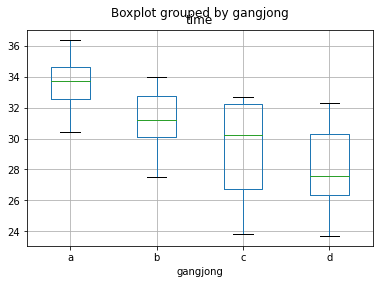

In [7]:
df.boxplot(column="time", by="gangjong") #강종별로 시간이 다르겠다는 것을 유추 가능

In [9]:
#ANOVA 실행, statsmodelis 라이브러리 사용
#formula = 'time ~ C(gangjong)' 모델링 시, 범주형일 때 괄호열고 넣어줌
lm = ols('time ~ C(gangjong)', data=df).fit()
print(anova_lm(lm))

               df      sum_sq    mean_sq         F    PR(>F)
C(gangjong)   3.0  104.603333  34.867778  4.171868  0.019013
Residual     20.0  167.156667   8.357833       NaN       NaN


              4-1    sumofsquare meansquare            p-value
              
              H1채택
              즉, 강종별로 2차 정련 시간에 차이가 있다.

# 실습 11

In [266]:
df = pd.read_csv("../data/통계data/correlation.csv", encoding="euc-kr")
df.head()

,strength,temp,Quantity,b_time,Oven_TMP
0,37.6,14,120.790646,0.798922,307.106574
1,38.6,15,99.643155,0.849020,318.178850
2,37.2,14,115.102395,0.816163,339.715122
3,36.4,16,114.640504,0.758266,341.174398
4,38.6,17,141.266536,0.815894,335.904402


In [267]:
df = df[['strength', 'temp']]
# df.head()
# df['strength']

0     37.6
1     38.6
2     37.2
3     36.4
4     38.6
      ... 
81    29.9
82    30.0
83    28.7
84    30.0
85    29.0
Name: strength, Length: 86, dtype: float64

In [110]:
corr, pval = stats.pearsonr(df['strength'], df['temp'])
corr, pval

(-0.899389295050681, 6.254873246096176e-32)

In [111]:
print("Correlation Analysis")
print("corr: {0:0.3f}".format(corr))
print("p-value: {0:0.3f}".format(pval))
#관련성이 있다.

Correlation Analysis
corr: -0.899
p-value: 0.000
